# Chapter 10: Introduction to Artificial Neural Networks with Keras

__Artificial Neural Networks (ANNs)__

- ANN Architectures and __Multilayer Perceptrons__ (MLPs) 多层感知器
- Implement neural networks using Keras API

## Set Up

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
tf.__version__

'2.2.0'

In [3]:
from tensorflow import keras
keras.__version__

'2.3.0-tf'

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [5]:
y_pred

array([1])

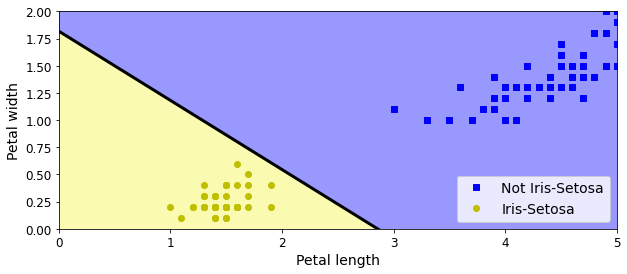

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

plt.show()

# Activation functions

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def hyperbolic_tanh (z):
    return 2* sigmoid(2*z) -1

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

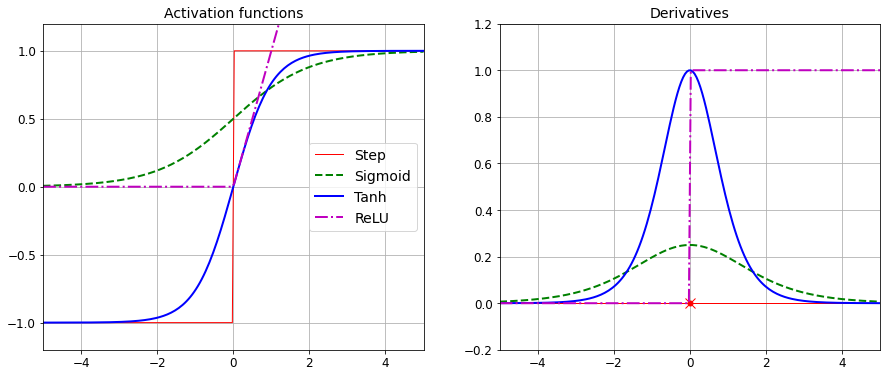

In [8]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(15,6))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
# plt.plot(z, hyperbolic_tanh(z), "y-", linewidth=2, label="hyperbolic_Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

## Multilayer perception is able to solve exclusive OR Problem

In [9]:
# heaviside step function
def heaviside(z):
    return (z >= 0).astype(z.dtype)

# Multilayer perceptron solves exclusive OR Problem
def mlp_xor(x1, x2, activation=heaviside):
    # the weight is -1.5 and -0.5 for input layer bias neuron, and -0.5 for output layer bias neuron
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

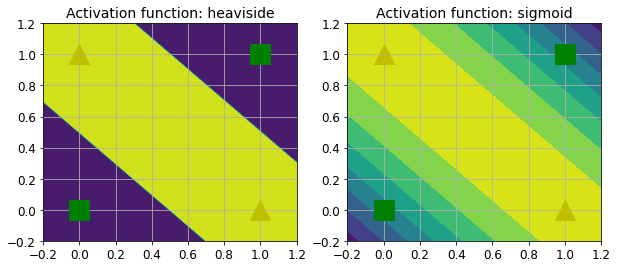

In [10]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier Using Sequential API

### Using Keras to load a dataset
Let's start by loading the ___fashion MNIST dataset___. 
- Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
# The training set contains 60,000 grayscale images, each 28x28 pixels
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [13]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a __validation set__ and a (smaller) training set. 

We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [14]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

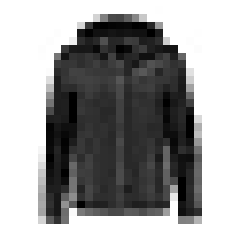

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


So the first image in the training set is a coat:

In [18]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [19]:
X_valid.shape

(5000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

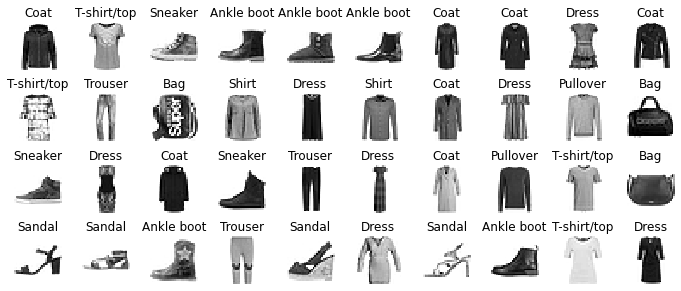

In [21]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### Creating the model using Sequential API

__A classification MLP with two hidden layers__

In [22]:
# first, create a Sequential model (the simplest model for neural network)
# It just composed of a single stack of layers coneected sequentailly
model = keras.models.Sequential()

# Second, build first layer, add it to the model
# A Flatten layer: convert each image from (28,28) array into a 1D array. X.reshape(-1,1)
model.add(keras.layers.Flatten(input_shape=[28, 28])) # equivalent to keras.layers.InputLayer(input_shape=[28,28])

# Third, add a Dense Hidden layer with 300 neurons
# Each Dense layer manages its own weight matrix, including vector of bias term (One per neuron)
# The weight matrix containing all connections between neurons and their won inputs
model.add(keras.layers.Dense(300, activation="relu")) # Using ReLU activation function

# Next, the second hidden layer (upper layer), with 100 nerons
model.add(keras.layers.Dense(100, activation="relu"))

# Finally, add a Dense output layer with 10 nerons (One per class)
model.add(keras.layers.Dense(10, activation="softmax")) # Using softmax activation because classes are exclusive !

In [23]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

__Another way to do it__: pass a list of sequential layers when creating the model

In [24]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [25]:
model.layers

Model's __summary()__ method:layer's name, output shape , number of parameters (trainable and non-trainable parameters)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


__None__ means batch size can be any shape

- first hidden layer has 784 × 300 connection weights, plus 300 bias terms, which adds up to 235,500 parameters
- lot of flexibility to fit the training data
- the risk of overfitting

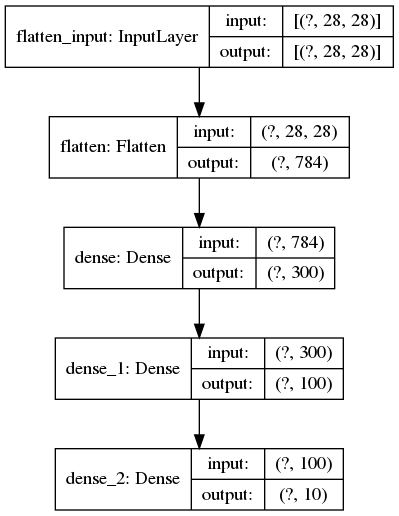

In [27]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [28]:
# Fetch layer by its index of name
hidden1 = model.layers[1]
hidden1.name

'dense'

In [29]:
model.get_layer(hidden1.name) is hidden1

True

__All parameters of a layer can be accessed using `get_weights()` and `set_weight()` method__

In [30]:
# For a Dense layer, it has connection weight and bias term
weights, biases = hidden1.get_weights()

In [31]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

__The weights are initialized randomly (to breake symmetry)__

In [32]:
# Shape of the weight matrix depends on number of inputs (28*28 = 784)
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

__Further initialziation method will be introduced in chaper 11__

## Compiling the Model

In [35]:
# specify the loss function and optimizer 
# optionally can specify other extra metrices to compute
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
# optimizer: stochastic gradient descent. 
# i.e., the backpropagation algorithm (reverse-mode auto differentiation + Gradient descent)

This is equivalent to:
    
```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```
- `sparse_categorical_crossentropy`: because we have __sparse labels__: for each instance, only one target class index, each classes are exclusive.
- If we had one target probability per class for each instance.(such as __one-hot vectors__, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we need to use `categorical_crossentropy`

- If we are doing binary classificatoin: we need to use `sigmoid` (logistic) activation function in __output layer__ (instead of softmax). Also need use `binary_crossentropy` loss function

## Train and  evaluating the model

In [36]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7239 - accuracy: 0.7643 - val_loss: 0.5218 - val_accuracy: 0.8210
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4843 - accuracy: 0.8320 - val_loss: 0.4354 - val_accuracy: 0.8524
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5320 - val_accuracy: 0.7986
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4121 - accuracy: 0.8560 - val_loss: 0.3916 - val_accuracy: 0.8654
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3937 - accuracy: 0.8622 - val_loss: 0.3748 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3748 - accuracy: 0.8676 - val_loss: 0.3706 - val_accuracy: 0.8728
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3628 - accuracy: 0.8713 - val_loss: 0.3630 - val_accuracy:

__performance on the training set is much better than on the validation set, your model is probably `overfitting` the training set__

Here we have validation accuracy 89.26%, not far from training accuracy. Not seems to be overfitting

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

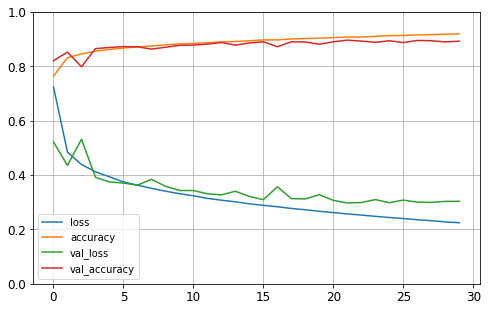

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

__As we can see, the validation loss is still going down, so the model has not converge yet__

- So need to call `fit()` again, keras will continues training where it left off

In [41]:
# Continue to train until it converges
history2 = model.fit(X_train, y_train, epochs=30,
                   validation_split=0.1)

Epoch 1/30
1547/1547 [==============================] - 2s 1ms/step - loss: 0.2194 - accuracy: 0.9213 - val_loss: 0.2329 - val_accuracy: 0.9131
Epoch 2/30
1547/1547 [==============================] - 2s 1ms/step - loss: 0.2155 - accuracy: 0.9228 - val_loss: 0.2371 - val_accuracy: 0.9109
Epoch 3/30
1547/1547 [==============================] - 2s 2ms/step - loss: 0.2129 - accuracy: 0.9244 - val_loss: 0.2265 - val_accuracy: 0.9156
Epoch 4/30
1547/1547 [==============================] - 2s 1ms/step - loss: 0.2088 - accuracy: 0.9249 - val_loss: 0.2228 - val_accuracy: 0.9176
Epoch 5/30
1547/1547 [==============================] - 2s 1ms/step - loss: 0.2058 - accuracy: 0.9261 - val_loss: 0.2283 - val_accuracy: 0.9149
Epoch 6/30
1547/1547 [==============================] - 2s 1ms/step - loss: 0.2026 - accuracy: 0.9276 - val_loss: 0.2332 - val_accuracy: 0.9145
Epoch 7/30
1547/1547 [==============================] - 2s 1ms/step - loss: 0.1980 - accuracy: 0.9294 - val_loss: 0.2274 - val_accuracy:

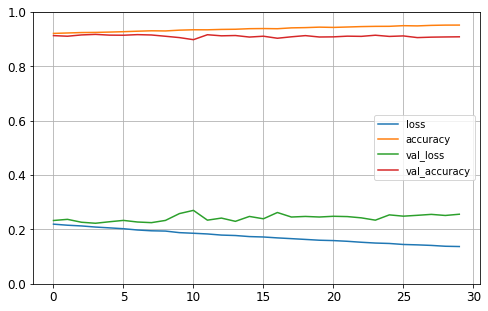

In [42]:

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

#### Side Note:

- If the training set was very skewed, with some classes being `overrepresented` and others `underrepresented`,
- set the __`class_weight`__ argument when calling __fit()__ method

- Per-instance weight can be set by __sample_weigt__ argument

#### Hyperparameter tuning: if you are not satisfied with you model
- The first one to check is the __learning rate__. 
- If that doesn’t help, try another optimizer (and always retune the learning rate after changing any hyperparameter).
- tuning model hyperparameters such as the number of layers, the number of neurons per layer, and the types of activation functions to use for each hidden layer. 
- batch size (it can be set in the fit() method using the batch_size argument, which defaults to 32)


## Final step: Evaluation on test set to estimate generalizatio erro

In [43]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 770us/step - loss: 0.3442 - accuracy: 0.8843


[0.34419742226600647, 0.8842999935150146]

In [44]:
# Use model to make predictions
X_new = X_test[:3]
# The probabilities of each class for each instance
y_proba = model.predict(X_new)
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.   ,
        0.997],
       [0.   , 0.   , 0.997, 0.   , 0.003, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [45]:
# Only the higherst probability
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [46]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

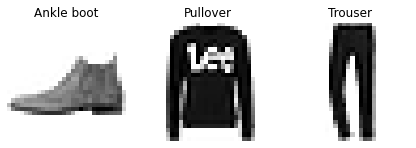

In [48]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

# Buidling a Regresison MLP Using Sequential API

- California housing problem, using __regression neural network__

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [49]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

In [51]:
# sequential keras model
model = keras.models.Sequential([
    # Just a single hidden layer 
    keras.layers.Dense(30, activation="relu", 
                       input_shape=X_train.shape[1:]),
    # Output layer: a single neuron, no activation funtion, loss function is MSE
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=20, 
                    validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 837us/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 842us/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 760us/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 747us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 762us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 723us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 776us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 733us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 751us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 768us/step - loss: 0.487

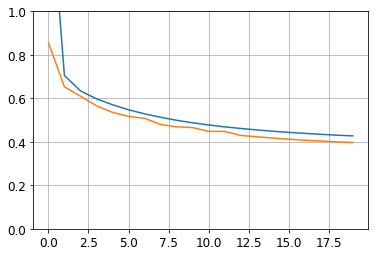

In [52]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Building Complex Models using Functional API

- Not all neural network models are simply sequential. 
- Some may have complex topologies. 
- Some may have multiple inputs and/or multiple outputs. 
- For example (`nonsequential neural network`), a __Wide & Deep__ neural network (see [paper](https://ai.google/research/pubs/pub45413)) connects all or part of the inputs directly to the output layer.

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

__Build the Wid & deep neural network model for housing data__

In [54]:
# First, Create a input object
input_ = keras.layers.Input(shape=X_train.shape[1:]) # specify input type the model will get (shape, dtype)

# Second, a Dens layer with 30 Neurons, ReLU activation
hidden1 = keras.layers.Dense(30, activation="relu")(input_) # we call it as a function, passing it the input
# We are just telling keras how to connect the layers, actual data not processed yet

# Next hidden layer, it connects the output of first hidden layer
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

# A Concatenate layer
concat = keras.layers.concatenate([input_, hidden2]) # concatenate the input and second hidden layer's output

# Lastly, a output layer, a single neuron without activation funtion
output = keras.layers.Dense(1)(concat) # passing the result of the concatenation

# Build the model, specify the final input and output
model = keras.models.Model(inputs=[input_], outputs=[output])

In [55]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [56]:
# Compile, train, evaluate, predict
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

# Train it 
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
# Evalueate
mse_test = model.evaluate(X_test, y_test)

# Prediction
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 0s 863us/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 800us/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 797us/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 850us/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 800us/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 811us/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 791us/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 801us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 793us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 786us/step - loss: 0.465

In [57]:
mse_test

0.4031672477722168

In [58]:
y_pred

array([[0.47010726],
       [1.8735046 ],
       [3.379823  ]], dtype=float32)

What if you want to send different subsets of input features through the wide or deep paths?

We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

### Handling multiple input

In [59]:
np.random.seed(42)
tf.random.set_seed(42)

In [60]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [61]:
# Compile model
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# Split the data set (training, testing, validation) into A and B group
# A for Wide path, B for deep path(go through hidden layers)
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

# Tran the model: need pass a apir of matrices (X_train_A, X_train_B), one per input
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 918us/step - loss: 1.8145 - val_loss: 0.8072
Epoch 2/20
363/363 [==============================] - 0s 821us/step - loss: 0.6771 - val_loss: 0.6658
Epoch 3/20
363/363 [==============================] - 0s 825us/step - loss: 0.5979 - val_loss: 0.5687
Epoch 4/20
363/363 [==============================] - 0s 826us/step - loss: 0.5584 - val_loss: 0.5296
Epoch 5/20
363/363 [==============================] - 0s 821us/step - loss: 0.5334 - val_loss: 0.4993
Epoch 6/20
363/363 [==============================] - 0s 836us/step - loss: 0.5120 - val_loss: 0.4811
Epoch 7/20
363/363 [==============================] - 0s 835us/step - loss: 0.4970 - val_loss: 0.4696
Epoch 8/20
363/363 [==============================] - 0s 864us/step - loss: 0.4843 - val_loss: 0.4496
Epoch 9/20
363/363 [==============================] - 0s 881us/step - loss: 0.4730 - val_loss: 0.4404
Epoch 10/20
363/363 [==============================] - 0s 822us/step - loss: 0.464

### Cases when you want to have __multiple output__

1. locate and classify the main object in a picture. (both regression and classification)
2. may have multiple independent tasks based on the same data. 
    - you could train one neural network per task
    -  you will get better results on all tasks by training a single neural network with __one output per task__
    - This is because the neural network can ___learn features in the data that are useful across tasks___.
    - Example: __multitask classification__ on pictures of faces, using one output to classify the person’s facial expression (smiling, surprised, etc.) and another output to identify whether they are wearing glasses or not.
3. regularization technique 
   - a training constraint whose objective is to reduce overfitting and thus improve the model’s ability to generalize
   - For example, you may want to add some __`auxiliary outputs辅助`__ in a neural network architecture. to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network.

### Example of Adding an auxiliary output for regularization:

In [62]:
np.random.seed(42)
tf.random.set_seed(42)

In [63]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [64]:
# each output needs its own loss function
# we care more about the main output, auxiliary output is just for regularization
model.compile(loss=["mse", "mse"], 
              loss_weights=[0.9, 0.1], 
              optimizer=keras.optimizers.SGD(lr=1e-3))

In [65]:
# Traning the model
# Need to provide label for each output. As here, the main and auxilary output are predicting the same thing
# so both of them are y_train. same for validation set and test set
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - aux_output_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_aux_output_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 951us/step - loss: 0.8905 - main_output_loss: 0.6969 - aux_output_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_aux_output_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 905us/step - loss: 0.7429 - main_output_loss: 0.6088 - aux_output_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_aux_output_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 922us/step - loss: 0.6771 - main_output_loss: 0.5691 - aux_output_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_aux_output_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 0s 912us/step - loss: 0.6381 - main_output_loss: 0.5434 - aux_output_loss: 1.4911 - 

In [66]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])


162/162 [==============================] - 0s 603us/step - loss: 0.4668 - main_output_loss: 0.4178 - aux_output_loss: 0.9082


In [67]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [68]:
y_pred_main

array([[0.26762432],
       [1.980763  ],
       [3.3396287 ]], dtype=float32)

In [69]:
y_pred_aux

array([[0.9593649],
       [1.9240992],
       [2.5152814]], dtype=float32)

# Using The subclassing API to build Dynamic Models

- Both Sequential API and Functional API are declarative
  - declaring which layers you want to use and how ot connected
  - Then you compile and training
  - Advantage: model can be easily saved, cloned and shared; structure can be displayed and analyzed; framework can infer shapes and check types; error can be caught early
  - Disadvantage: it is static
  
- Some models involve loops, varing shapes, conditional branching, and other __dynamic behavior__

- A more imperative 必要 programming style: Subclassing API


In [70]:
#-----------------This is a equivalent model to the previous Functional API example-------------
# Subclass the Model class
class WideAndDeepModel(keras.models.Model):
    # constructor: create the layers you need
    def __init__(self, units=30, activation="relu", **kwargs):
        # We do not need to create input here (no specification of input types)
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    # Use the MLP to perform computation when you use call() method 
    # You can do anything in call() method: Loops, if statement, low-level Tenserflow operations
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [71]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 887us/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 934us/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 975us/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 962us/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.596

### Drawbacks of dynamic models using subclassing API

- Model architecture is hidden. Keras cannot inspect
- cannot save the model or clone. 
- call summary() method, only give you list of layers, without info on how they connected 
- Cannot check types and shapes a head of time
- Easier to make mistake

# Saving and Restoring

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [74]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 868us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 790us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 774us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 817us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 780us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 811us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 791us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 805us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 804us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 512us/step - loss: 0.438

In [75]:
model.save("my_keras_model.h5")

- __Save as `HDF5 format`, to save both model's architecture__ (including layer's hyperparameters) and the values of all model parameters for every layer (e.g. connection weights and bias)

- Also saves optimizer

- Typically, we have a script that trains and saves it
- One or more scripts (or web service) load the model to make predictions

In [76]:
# load model
model = keras.models.load_model("my_keras_model.h5")

In [77]:
model.predict(X_new)

array([[0.5400236],
       [1.6505971],
       [3.0098243]], dtype=float32)

In [78]:
# for Model subclassing, you will can only save weights, but to save and restore everything else yourself
model.save_weights("my_keras_weights.ckpt")

In [79]:
model.load_weights("my_keras_weights.ckpt")

# Using Callbacks During training

- fit() method accepts a __callbacks__ argument
- lets you specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch
- the ModelCheckpoint callback saves __checkpoints__ of your model at regular intervals during training(default at the end of each epoch)

In [80]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [81]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
]) 

In [82]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# a ModelCheckpoint callback: saves checkpoint at each epock end
# save_best_only=True: usin a validation set during training
# It will only save the model when performance is the best on validation set so far
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
# So no need to worry traning too far and overfitting

#-----------To implement early stopping ----------
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 903us/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 814us/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 795us/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 802us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 789us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 791us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 844us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 786us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 798us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 496us/step - loss: 0.438

__Another way to implement early stopping__

In [83]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

# EarlyStopping callback: interrupt the training when no progress on validation set 
# for a number of epoch (defined be patience)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    # combine both checkpoint callback and early stopping
                    # As this will save checkpoints of your model and also interrupt training to early stop
                    callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 962us/step - loss: 0.4393 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 813us/step - loss: 0.4315 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 794us/step - loss: 0.4259 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 0s 811us/step - loss: 0.4201 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 804us/step - loss: 0.4154 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 824us/step - loss: 0.4111 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 844us/step - loss: 0.4074 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 780us/step - loss: 0.4040 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 809us/step - loss: 0.4008 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 0s 912us/step - l

### __Custom Callback__

- example: display the ratio between validation loss and training loss (to detect overfitting)

In [84]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    # you can implemetn on_train_begin()
    # on_train_end()
    # on_epooch_begain()
    # on_batch_begin()
    # on_batch_end()
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))
        
    # Callback can also be using in evaluation and predictions (for debugging)
    # implement on_test_begin(), on_test_end(), on_test_batch_begin(), or on_test_batch_end() (called by evaluate()), 
    # Implement on_predict_begin(), on_predict_end(), on_predict_batch_begin(), or on_predict_batch_end() (called by predict()
    


In [85]:
val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/10
310/363 [========================>.....] - ETA: 0s - loss: 0.3285
val/train: 1.08
363/363 [==============================] - 0s 874us/step - loss: 0.3302 - val_loss: 0.3556
Epoch 2/10
354/363 [============================>.] - ETA: 0s - loss: 0.3303
val/train: 1.00
363/363 [==============================] - 0s 789us/step - loss: 0.3301 - val_loss: 0.3304
Epoch 3/10
352/363 [============================>.] - ETA: 0s - loss: 0.3304
val/train: 1.02
363/363 [==============================] - 0s 765us/step - loss: 0.3296 - val_loss: 0.3347
Epoch 4/10
348/363 [===========================>..] - ETA: 0s - loss: 0.3295
val/train: 0.95
363/363 [==============================] - 0s 776us/step - loss: 0.3295 - val_loss: 0.3141
Epoch 5/10
342/363 [===========================>..] - ETA: 0s - loss: 0.3262
val/train: 1.02
363/363 [==============================] - 0s 801us/step - loss: 0.3291 - val_loss: 0.3367
Epoch 6/10
345/363 [===========================>..] - ETA: 0s - loss: 0.3274
val

## Using TensorBoard for Visualization

a great interactive visualization tool that you can use to view the
learning curves during training, compare learning curves between multiple runs,
visualize the computation graph, analyze training statistics, view images
generated by your model, visualize complex multidimensional data projected
down to 3D and automatically clustered for you


####  Make the program outputs the data you want to visualize to special binary log files called __event files__.
__each binary data record is called a `summary`__

In [86]:
# Define a root dictionary for log file
root_logdir = os.path.join(os.curdir, "my_logs")

In [87]:
# A function to generate subdictionary
# This is to make it writes to a different subdirectory every time it runs. 
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_05_24-19_06_59'

In [88]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [89]:
# A sequential Model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

__`Tensorboard()`__ callback:

- it will automatic creating the log dictionary for you
- It will create __event files__ and write summary into it


In [90]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 1.8866 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6577 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5934 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 995us/step - loss: 0.5557 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 985us/step - loss: 0.5272 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 987us/step - loss: 0.5033 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 970us/step - loss: 0.4854 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 959us/step - loss: 0.4709 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 0s 982us/step - loss: 0.4578 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4474 - val_

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

```bash
$ tensorboard --logdir=./my_logs --port=6006
```

You can then open your web browser to [localhost:6006](http://localhost:6006) and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [91]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

In [92]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_05_24-19_20_45'

In [93]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [94]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

# We use learning rate = 0.05 in second run (faster than first run)
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [95]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5530 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 5292745216.0000 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3411 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 953us/step - loss: 1.3423 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3423 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 960us/step - loss: 1.3431 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3425 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 967us/step - loss: 1.3433 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 985us/step - loss: 1.3435 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 978us/step - loss: 1.34

Check out the other available logging options:

In [96]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



Notice how TensorBoard now sees two runs, and you can compare the learning curves.

In [97]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 4837), started 0:06:14 ago. (Use '!kill 4837' to kill it.)

# Fine-Tuning Neural Network Hyperparameters

- the number of layers, 
- the number of neurons per layer, 
- the type of activation function to use in each layer, 
- the weight initialization logic, and much more.

__Solution__

__1. K-fold cross-validation:  `GridSearchCV` or `RandomizedSearchCV`__

 we need to wrap our Keras models in objects that ___mimic regular Scikit-Learn regressors___.

In [98]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [99]:
# Step 1: create a function to build and compile keras model

# a Sequential Model for univariant regression (one output neuron)
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [100]:
# create A KerasRegressor based on build_model() 
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [101]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 0s 869us/step - loss: 1.0896 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 753us/step - loss: 0.7606 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 770us/step - loss: 0.5456 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 772us/step - loss: 0.4732 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 771us/step - loss: 0.4503 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 770us/step - loss: 0.4338 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 793us/step - loss: 0.4241 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 775us/step - loss: 0.4168 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 778us/step - loss: 0.4108 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 756us/step - 

In [102]:
# we can use the KerasRegressor as a regular scikit-learn regressor
# it can use score() for evalueate 
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 562us/step - loss: 0.3409


In [104]:
mse_test
# The MSE (opposite to loss), the higher the better score

-0.3408546447753906

In [103]:
# use predict() to predict new value
y_pred = keras_reg.predict(X_new)

In [105]:
np.random.seed(42)
tf.random.set_seed(42)

__Next, train hundreds of variants to see which performs best on validation set__

Since there are many hyperparameters, we need to use __randomized search__ rather than grid search

- Explore number of hudden layers, number of neurons and learning rate

In [106]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

__warning: This may last hours__

In [108]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..
Epoch 1/100
  1/242 [..............................] - ETA: 0s - loss: 5.1962

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 0s 1ms/step - loss: 3.3356 - val_loss: 3.9834
Epoch 2/100
242/242 [==============================] - 0s 973us/step - loss: 1.5172 - val_loss: 2.6422
Epoch 3/100
242/242 [==============================] - 0s 969us/step - loss: 1.0401 - val_loss: 1.6873
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.8614 - val_loss: 1.1570
Epoch 5/100
242/242 [==============================] - 0s 981us/step - loss: 0.7757 - val_loss: 0.8764
Epoch 6/100
242/242 [==============================] - 0s 971us/step - loss: 0.7278 - val_loss: 0.7631
Epoch 7/100
242/242 [==============================] - 0s 971us/step - loss: 0.6983 - val_loss: 0.6883
Epoch 8/100
242/242 [==============================] - 0s 947us/step - loss: 0.6772 - val_loss: 0.6498
Epoch 9/100
242/242 [==============================] - 0s 964us/step - loss: 0.6602 - val_loss: 0.6242
Epoch 10/100
242/242 [==============================] - 0s 973us/step - loss: 0.6450 - va

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.7s remaining:    0.0s


242/242 [==============================] - 0s 1ms/step - loss: 3.3864 - val_loss: 2.7226
Epoch 2/100
242/242 [==============================] - 0s 965us/step - loss: 1.4432 - val_loss: 3.3501
Epoch 3/100
242/242 [==============================] - 0s 953us/step - loss: 0.9579 - val_loss: 2.4282
Epoch 4/100
242/242 [==============================] - 0s 946us/step - loss: 0.7734 - val_loss: 1.4821
Epoch 5/100
242/242 [==============================] - 0s 994us/step - loss: 0.6838 - val_loss: 0.9293
Epoch 6/100
242/242 [==============================] - 0s 945us/step - loss: 0.6377 - val_loss: 0.6846
Epoch 7/100
242/242 [==============================] - 0s 949us/step - loss: 0.6099 - val_loss: 0.5874
Epoch 8/100
242/242 [==============================] - 0s 940us/step - loss: 0.5900 - val_loss: 0.5709
Epoch 9/100
242/242 [==============================] - 0s 960us/step - loss: 0.5740 - val_loss: 0.5928
Epoch 10/100
242/242 [==============================] - 0s 908us/step - loss: 0.5600 - 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.1min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f3ff92ed518>, as the constructor either does not set or modifies parameter learning_rate

In [109]:
rnd_search_cv.best_params_

{'learning_rate': 0.0051747964719537, 'n_hidden': 3, 'n_neurons': 55}

In [110]:
rnd_search_cv.best_score_

-0.3281243344148

In [111]:
rnd_search_cv.best_estimator_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [112]:
rnd_search_cv.score(X_test, y_test)

AttributeError: 'RandomizedSearchCV' object has no attribute 'scorer_'

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
model.evaluate(X_test, y_test)